# Day 9

In [1]:
with open('input-09.txt') as f:
    lines = f.read()

In [2]:
data = lines
data = data.split('\n')[:-1]

In [3]:
data[:8]

['L 1', 'R 1', 'U 1', 'R 1', 'L 1', 'U 2', 'L 2', 'R 1']

In [4]:
def numericalInstruction(instruction):
    direction, steps = instruction.split()
    directionToVector = {'L':(-1,0), 'R':(1,0), 'D':(0,-1), 'U':(0,1)}
    vector = directionToVector[direction]
    steps = int(steps)
    return (vector, steps)

In [5]:
instuctions = [numericalInstruction(item) for item in data]
instuctions[:8]

[((-1, 0), 1),
 ((1, 0), 1),
 ((0, 1), 1),
 ((1, 0), 1),
 ((-1, 0), 1),
 ((0, 1), 2),
 ((-1, 0), 2),
 ((1, 0), 1)]

In [6]:
head_trail = []
head_trail.append((0,0))
for instuction in instuctions:
    for step in range(instuction[1]):
        x, y = head_trail[-1]
        x += instuction[0][0]
        y += instuction[0][1]
        head_trail.append((x, y))
head_trail[:8]

[(0, 0), (-1, 0), (0, 0), (0, 1), (1, 1), (0, 1), (0, 2), (0, 3)]

In [7]:
"""
             -1,1   0,1   1,1
               :     :     :
             -1,2   0,2   1,2
 -1,1 : -2,1   x     x     x   2,1 : 1,1
 -1,0 : -2,0   x     T     x   2,0 : 1,0
-1,-1 : -2,-1  x     x     x  2,-1 : 1,-1
             -1,-2  0,-2  1,-2		
               :     :     :
             -1,-1  0,-1  1,-1
"""
rules = {\
(2,1):(1,1), \
(2,0):(1,0), \
(2,-1):(1,-1), \
(-1,2):(-1,1), \
(0,2):(0,1), \
(1,2):(1,1), \
(-2,1):(-1,1), \
(-2,0):(-1,0), \
(-2,-1):(-1,-1), \
(-1,-2):(-1,-1), \
(0,-2):(0,-1), \
(1,-2):(1,-1)}

In [8]:
tail_trail = [head_trail[0]]

for position in head_trail[1:]:
    
    headX, headY = position
    tailX, tailY = tail_trail[-1]
    
    relative_position = (headX - tailX, headY - tailY)

    if relative_position in rules.keys():
        deltaX, deltaY = rules[relative_position]
        tail_trail.append((tailX+deltaX, tailY+deltaY))
    else:
        tail_trail.append(tail_trail[-1])
tail_trail[-8:]

[(37, -44),
 (37, -45),
 (37, -46),
 (37, -47),
 (37, -48),
 (37, -49),
 (37, -49),
 (36, -50)]

In [9]:
answer1 = len(set(tail_trail))
answer1

6236

In [10]:
def get_next_trail(trail):
    next_trail = [trail[0]]

    for position in trail[1:]:

        headX, headY = position
        tailX, tailY = next_trail[-1]

        relative_position = (headX - tailX, headY - tailY)
        if relative_position in rules.keys():
            deltaX, deltaY = rules[relative_position]
            next_trail.append((tailX+deltaX, tailY+deltaY))
        else:
            next_trail.append(next_trail[-1])
    
    return next_trail

In [11]:
full_rope = []
for iteraion in range(10):
    if full_rope == []:
        full_rope.append(head_trail)
    else:
        full_rope.append(get_next_trail(full_rope[-1]))

In [12]:
len(set(full_rope[1]))

6236

In [13]:
len(set(full_rope[2]))

36

In [14]:
answer2 = len(set(full_rope[-1]))
answer2

1

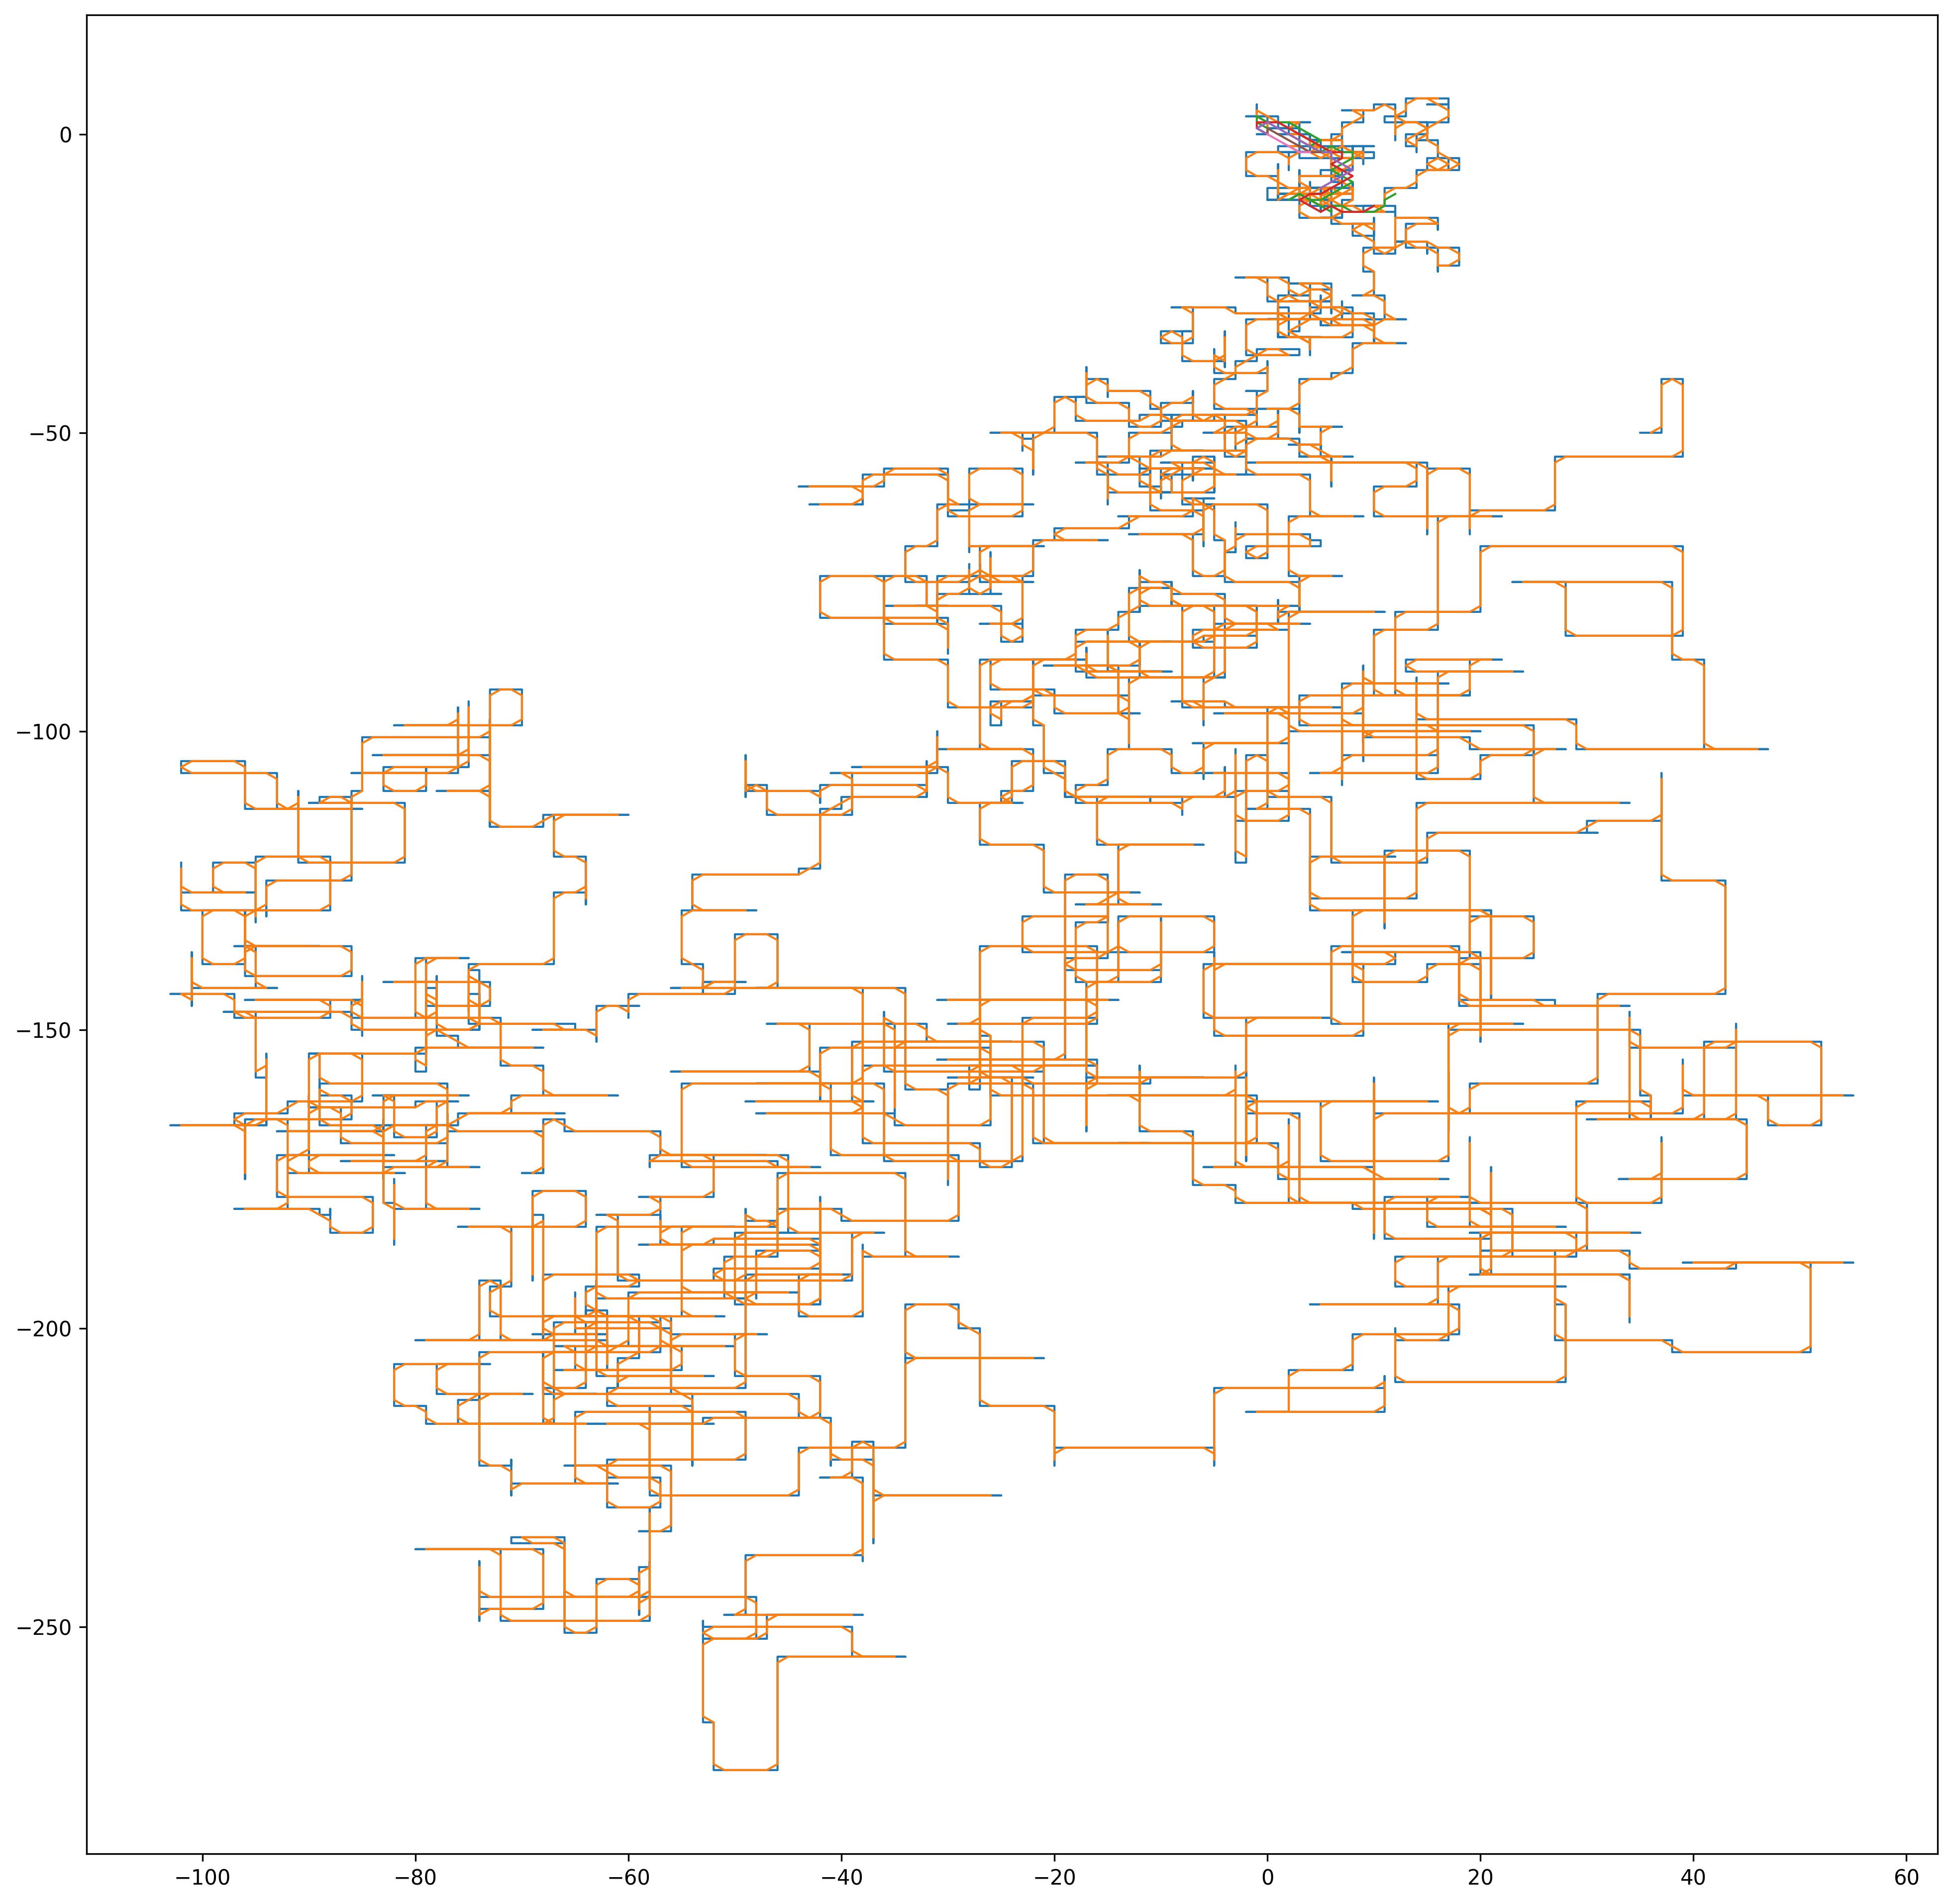

In [15]:
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#plt.style.use('_mpl-gallery')

# plot
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = (16, 16)

fig, ax = plt.subplots()

# make data
for node in full_rope:
    x, y = zip(*node)
    ax.plot(x, y, linewidth=1)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()